# Code for finding the optimal (lowest loss) parameters of a coaxmon for a given capacitance

The following code allows to find the optimal parameters w and s for a coaxmon qubit. Here w is the diameter of the central conductor and s is the separation between the inner and outer conductor (= gap width). The found parameters are optimal in the sense that for a specified capacitance, the participation ratio is lowest. 

The data that this code uses is obtained doing electrostatic simulations using APSYS Maxwell. 

In the APSYS Maxwell simulations the parameters w/s and w+2s were varied. 

The first step is to plot the dependence of the capacitance (C) on w/s and w+2s. It turns out that C scales linearly with w+2s, this can be clearly seen in the plot.
For every C as a function of w/s curve in the second plot we then find the w/s for which the curve intersects the line: C=C_desired. C_desired should be assigned in the cell below.
If no intersection is found (because not all curves have been calculated from w/s=0 to w/s= infinity), a warning is printed.

The next step is to find which participation ratio is associated with the found w/s for every w+2s curve. The found participation ratios are then compared and the best result is printed.

Of course there is a resolution problem in the final result because there is some finite separation between the calculated w+2s values. The result should at least be close to the ideal configuration though.

!! **Beware** when the result gives that the *smallest* or *largest* simulated w+2s value is the best one (note that the participation ratio is not always extracted for all w+2s because sometimes no interesection is found in the capacitance graph!) . In this case the design could possibly be improved even further by choosing an even smaller or larger w+2s value respectively. 

Note: especially for large C_desired you will always find that the largest w+2s is the best. This is because for large C_desired, we have large w/s and for large w/s, the participation ratio barely depends on w/s anymore and only on w+2s. Because the participation ratio is approximately inversely proportional to w+2s, the best option is the largest w+2s.

In [7]:
C_desired = 3 #in femto-Farad

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import special 
from scipy.interpolate import interp1d

Beware! No intersection found for curve with w+2s =  10
ws_found= [0.         2.11781935 1.18384307 0.81862904 0.62524062 0.50679102
 0.42440441 0.36653506 0.32251207 0.28730039]


C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


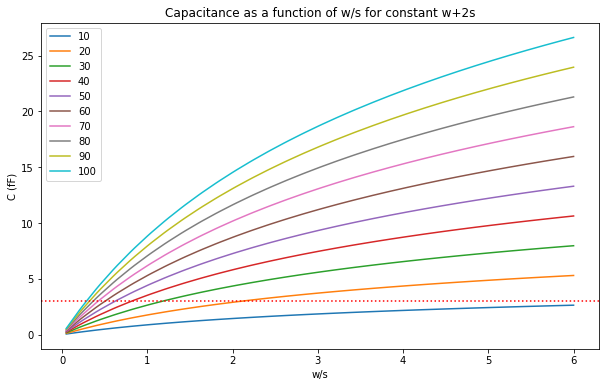

In [9]:
df = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Coaxmons\C_ws6.xlsx')
df2=df.as_matrix()
C =  df2[0:10, 1:49]
tot = np.array([10,20,30,40,50,60,70,80,90,100])
ws = np.array([0.05,0.2,0.25,0.4,0.45,0.6,0.65,0.8,0.85,1,1.05,1.2,1.25,1.4,1.45,1.6,1.65,1.8,1.85,2,2.05,2.2,2.25,2.4,2.45,2.6,2.65,2.8,2.85,3,3.05,3.2,3.25,3.4,3.45,3.65,3.85,4.05,4.25,4.45,4.65,4.85,5.05,5.25,5.45,5.65,5.85,6])
       
ws_found = np.zeros(len(tot))

for i in range(len(tot)):
    if np.all(np.diff(ws) > 0) == True and np.all(np.diff(C[:,i]) > 0):
        if max(C[i,:]) < C_desired or min(C[i,:]) >  C_desired:
            ws_found[i] = 0
            print('Beware! No intersection found for curve with w+2s = ',tot[i])
        else:
            ws_found[i] = np.interp(C_desired, C[i,:], ws)  
    else:
        print('x is not always increasing!!')
print('ws_found=', ws_found)

#fig1 = plt.figure(figsize=(10,6))
#for i in range(len(ws)):
#    plt.plot(tot, C[:,i])
#plt.xlabel('w+2s')
#plt.ylabel('C (fF)')
#plt.title('Capacitance as a function of w+2s for constant w/s')
#plt.legend(ws)

fig2 = plt.figure(figsize=(10,6))
for i in range(len(tot)):
    plt.plot(ws, C[i,:])
plt.xlabel('w/s')
plt.ylabel('C (fF)')
plt.title('Capacitance as a function of w/s for constant w+2s')
plt.legend(tot)
plt.axhline(C_desired, color='r', linestyle=':')
#plt.ylim((0,0.5)) #zoom in 
#plt.xlim((0,0.5))

#The following code shows that the capacitance depends linearly on 
#for i in range(len(tot)):
 #   plt.plot(ws,(i+1)*C[0,:], 'r:')



Text(0.5, 1.0, 'Capacitance as a function of w/s')

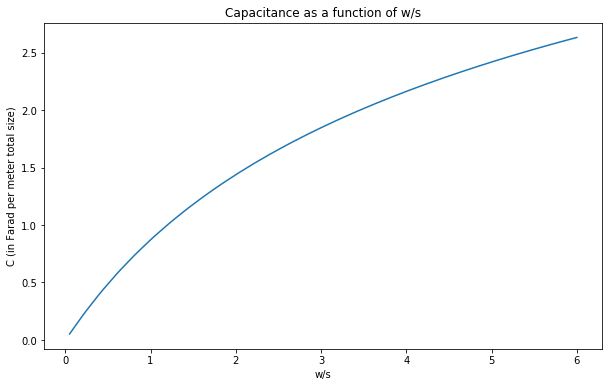

In [6]:
#'figure 1'
epsilon_0 = 8.8541878128e-12
epsilon_eff = (1+11.68)/2
C_ren = C[0,:]*1e-12/(tot[0]*1e-6*epsilon_0*epsilon_eff)

fig = plt.figure(figsize=(10,6))
plt.plot(ws, C[0,:])
plt.xlabel('w/s')
plt.ylabel('C (in Farad per meter total size)')
plt.title('Capacitance as a function of w/s')

C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Beware! the code might not have found the actual best configuration because not all w+2s values (10-100) could be taken into account
The minimum participation ratio found is = 0.002289663487509952
The corresponding w+2s value is = 100
The corresponding w/s value is = 0.28730038500880206


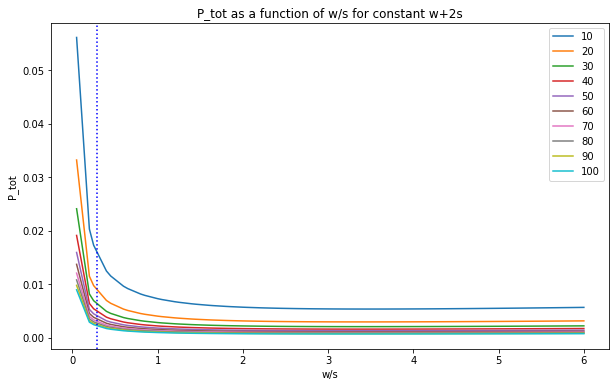

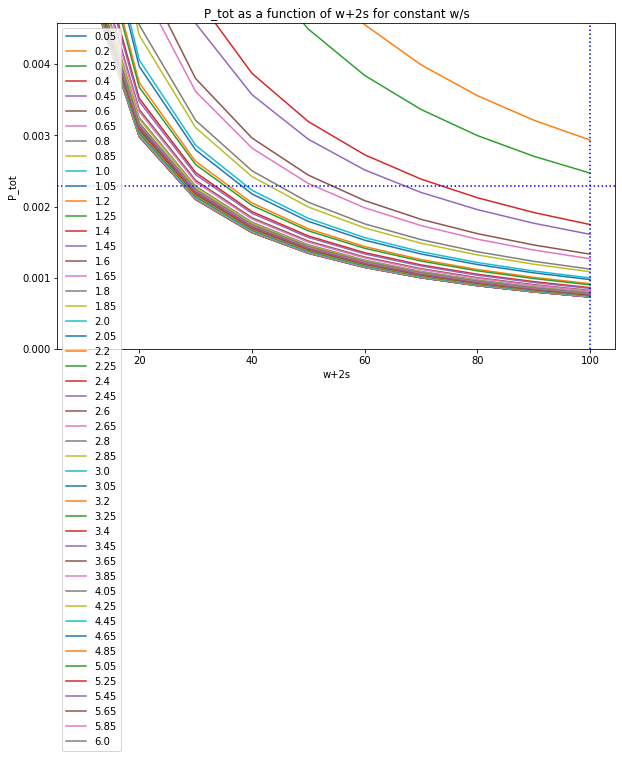

In [10]:
df = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Coaxmons\P_total_ws6.xlsx')
#print (df)
df2=df.as_matrix()
P_tot = df2[0:10, 1:49]
tot = np.array([10,20,30,40,50,60,70,80,90,100])
ws = np.array([0.05,0.2,0.25,0.4,0.45,0.6,0.65,0.8,0.85,1,1.05,1.2,1.25,1.4,1.45,1.6,1.65,1.8,1.85,2,2.05,2.2,2.25,2.4,2.45,2.6,2.65,2.8,2.85,3,3.05,3.2,3.25,3.4,3.45,3.65,3.85,4.05,4.25,4.45,4.65,4.85,5.05,5.25,5.45,5.65,5.85,6])

P_found = np.zeros(len(tot))
for i in range(len(tot)):
        if ws_found[i] == 0:
            P_found[i] = 1 #this ensures that we only take into account the curves for which an intersection was found
                           # in the previous cell.
        else:
            P_found[i] = np.interp(ws_found[i], ws, P_tot[i,:])  



fig1 = plt.figure(figsize=(10,6))
for i in range(len(tot)):
    plt.plot(ws, P_tot[i,:])
plt.xlabel('w/s')
plt.ylabel('P_tot')
plt.title('P_tot as a function of w/s for constant w+2s')
plt.legend(tot)
plt.axvline(ws_found[np.argmin(P_found)], color='b', linestyle=':')

if min(ws_found) == 0:
    print('Beware! the code might not have found the actual best configuration because not all w+2s values (10-100) could be taken into account')
print('The minimum participation ratio found is =', min(P_found))
print('The corresponding w+2s value is =', tot[np.argmin(P_found)])
print('The corresponding w/s value is =', ws_found[np.argmin(P_found)])

fig2 = plt.figure(figsize=(10,6))
for i in range(len(ws)):
    plt.plot(tot, P_tot[:,i])
plt.xlabel('w+2s')
plt.ylabel('P_tot')
plt.title('P_tot as a function of w+2s for constant w/s')
plt.legend(ws)
plt.axvline(tot[np.argmin(P_found)], color='b', linestyle=':')
plt.axhline(min(P_found), color='b', linestyle=':')
#plt.plot(tot, 1/tot*0.7, 'r:') #shows that P_tot is approximately inversely proportional to w+2s
plt.ylim((0,min(P_found)*2)) #zoom in 
if tot[np.argmin(P_found)] < max(tot)/2:
       plt.xlim((0,tot[np.argmin(P_found)]*2))